<a href="https://colab.research.google.com/github/sjncube/Sendy-Logistics-Challenge/blob/master/Zind_Sendy_Logistics_Challenge_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zindi Sendy Logistics Challenge

## Introduction

This notebook shows the workings of **Team 6** on finding a solution to the Sendy Logistics Challenge of using machine learning with an emphasis on regression analysis and related techniques to **estimate/predict the time of arrival for orders from pick-up to drop-off**.

The dataset (direct oders with bikes in Nirobi) provided includes:
 - Training dataset - a subset of over 20,000 direct orders to train the model on.
 - Test dataset - a subset of over 7,000 direct orders to apply the model on.
 - Riders dataset - contains riders information
 - VariableDefinitions - Definitions of variables in the Train, Test and Riders datasets

TEAM 6 MEMBERS:

  - Evans Marema
  - Sizwe Ncube
  - Shraddha Rajcoomar
  - Toby Masuku
  - Sandile Dladla


### Library Imports 

In [0]:
# Data-frames and array manupilation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Model Bulding and Traing 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Evalution
from sklearn.metrics import mean_squared_error, r2_score

# Model Boosting
from sklearn.model_selection import RandomizedSearchCV

### Data Imports

In [0]:
# Traing dataset
dataset_train = pd.read_csv('Train.csv')

# Test dataset
dataset_test = pd.read_csv('Test.csv')

# Rider info
dataset_rider = pd.read_csv('Riders.csv')

# Variable definition
variables = pd.read_csv('VariableDefinitions.csv')

In [58]:
dataset_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [59]:
dataset_test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [60]:
dataset_rider.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [61]:
variables

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [0]:
# Merging both traing and test datasets with the riders' dataset
dataset_train = dataset_train.merge(dataset_rider, how='left', on='Rider Id').set_index('Order No')
dataset_test = dataset_test.merge(dataset_rider, how='left', on='Rider Id').set_index('Order No')

In [63]:
dataset_train.head()

,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Order No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [64]:
dataset_test.head()

,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Order No,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


### Exploritory Data Analysis (EDA)

In [65]:
# Shape of data
print(dataset_train.shape)
print(dataset_test.shape)

(21201, 32)
(7068, 28)


The combined dataset of train and rider has 21201 record and 32 columns. <br>
The combined dataset of test and rider has 7068 record and 28 columns.

##### Checking for missing data

In [66]:
print('Train dataset:\n\n',dataset_train.isna().sum(),'\n')
print('Test dataset: \n\n',dataset_test.isna().sum())

Train dataset:

 User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time                    0
Distance (KM) 

Temperature and `Precipitation in millimeters` columns have missing values.

In [67]:
s_train = 'Train missing values :'
s_test = 'Test missing values  :'

print("Percentage of missing values 'Precipitation in millimeters'. \n")
print(s_train,
      dataset_train['Precipitation in millimeters'].isnull().mean().round(5)*100,'%')
print(s_test,
      dataset_test['Precipitation in millimeters'].isnull().mean().round(5)*100,'%')

Percentage of missing values 'Precipitation in millimeters'. 

Train missing values : 97.396 %
Test missing values  : 97.184 %


Removing the `Precipitation in millimeters` column is the best option since the column is almost empty.

In [68]:
print("Percentage of missing values for 'Temperature' \n")
print(s_train,dataset_train['Temperature'].isnull().mean().round(5)*100,'%')
print(s_test,dataset_test['Temperature'].isnull().mean().round(5)*100,'%')

Percentage of missing values for 'Temperature' 

Train missing values : 20.593 %
Test missing values  : 20.331 %


The missing rows in this column can be filled using a statistic or metric.

##### Summary Statistics

In [69]:
dataset_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


In [70]:
dataset_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,7068.0,2.752122,0.624000,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,7068.0,15.621817,8.776650,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),7068.0,3.249859,1.580926,1.000000,2.000000,3.000000,5.000000,7.000000
Distance (KM),7068.0,9.458970,5.575689,1.000000,5.000000,8.000000,13.000000,47.000000


On both the training and test sets we observe that the mean is a bit higher that the median and we also have a huge difference between the 75th percentile and the max which tells us that we might be having outliers in our data most noticably `No_Of_Orders` and `No_of_ratings`.

##### Correlation using a Heatmap

This plot is shows the correlation between columns have numeric observations in the training dataset.

Text(0.5, 1.0, 'Correlation Heatmap')

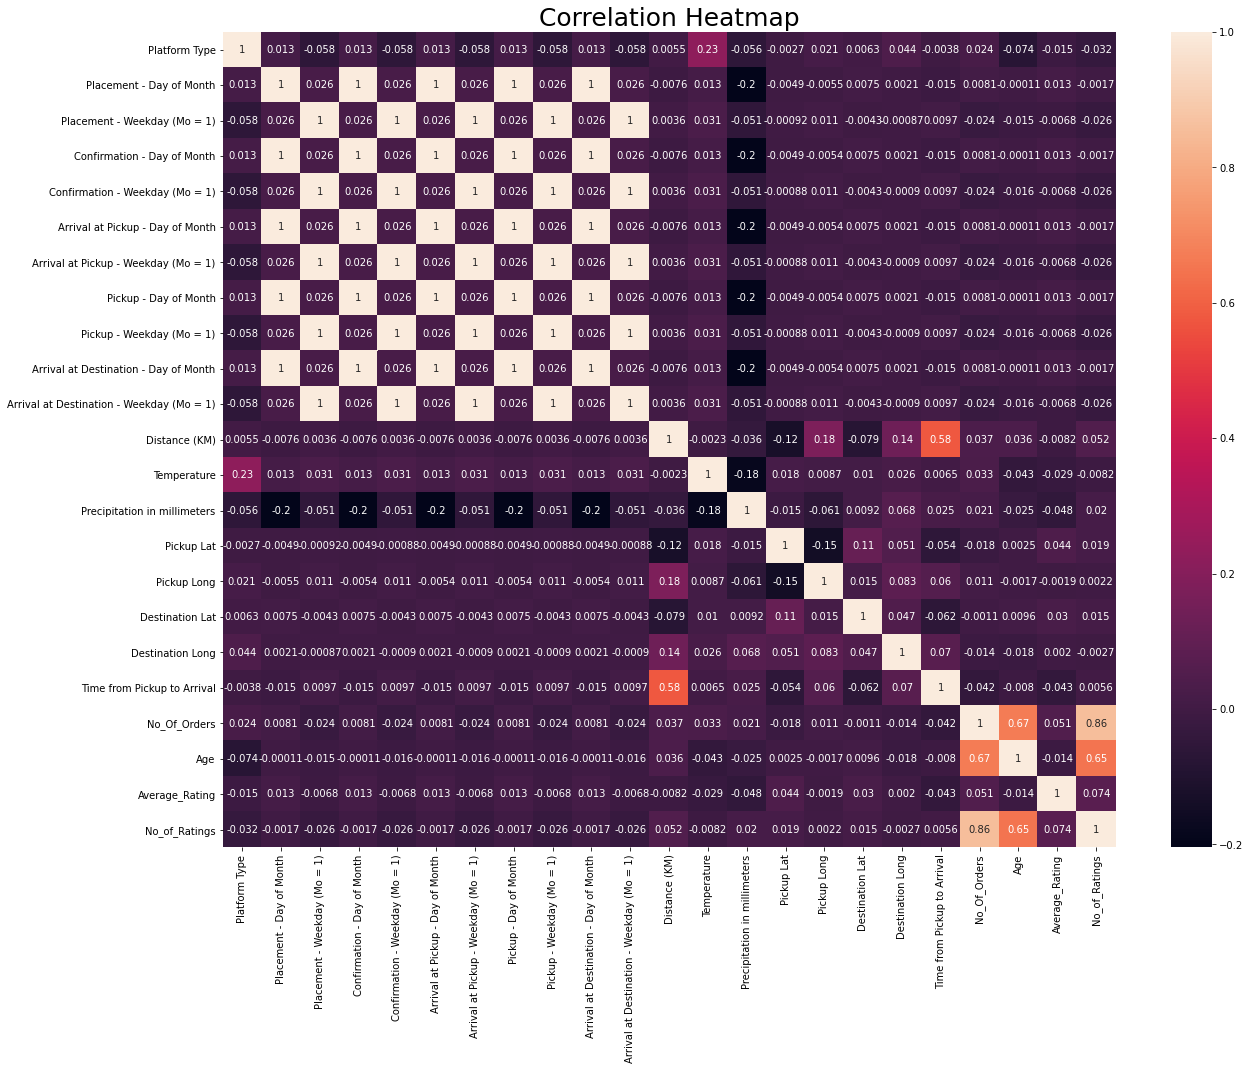

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset_train.corr(),annot=True) 
plt.title('Correlation Heatmap',fontsize=25)

Measures of the strength of correlation
- 0.00-0.19    “Very weak”
- 0.20-0.39    “Weak”
- 0.40-0.59    “Moderate”
- 0.60-0.79    “Strong”
- 0.80-1.0     “Very strong”

From the heatmap we see that so some columns have the same data points, these are represented as columns having correlations of one in the top left corner.

Correlations above 40% in both directions
- `Distance (KM)` v `Time from Pickup to Arrival`   $\approx$ 0.58
- `No_Of_Orders` v `Age`                            $\approx$ 0.68
- `No_Of_Orders` v `No_of_Ratings`                  $\approx$ 0.86
- `No_of_Ratings` v `Age`                           $\approx$ 0.65

We observe that `Disatnce (KM)` has the highest correlation to `Time from Pickup to Arrival`. This means that `Distance (KM)` is a strong preditor to the response variable and is our main feature for our model.

All other columns listed abve have moderate to strong correlations between them,even though there multicollinearity we are not going to remove them since they have week correlations and to `Time from Pickup to Arrival`.

### Imputing Missing data

This function is used to fill missing data points in the `Temperature` column using either mean or median

In [0]:
def Temp_imputer(df,fill_type=1):
    
    '''
    **Temp_imputer**
    
    Takes in a dataframe and fill_type as an integer and fills null values
    in the Temperature column.

    - Fill type 1 - fill with mean value of all data points.
    - Fill type 2 - fill with coresponding mean of Day of Month and Day of Week.
    - Fill type 3 - fill with median value of all data points.

    default is fill type 1
    '''
    
    df_copy = df.copy()
    if fill_type == 1:
        mean_df_1 = round(df_copy['Temperature'].mean(),1)
        df_copy['Temperature'].fillna(value=mean_df_1,inplace=True)
        return df_copy
    
    elif fill_type == 2:
        mean_ind = dict(round(df_copy.groupby(
            ['Placement - Day of Month',
             'Placement - Weekday (Mo = 1)'])['Temperature'].transform(
                 'mean'),1))
        df_copy['Temperature'].fillna(value=mean_ind,axis=0,inplace=True)
        
        mean_df_2 = round(df_copy['Temperature'].mean(),1)
        
        if df_copy['Temperature'].isna().sum() > 0:
            df_copy['Temperature'].fillna(value=mean_df_2,inplace=True)
            return df_copy
        else:
            return df_copy
        
    elif fill_type == 3:
        median_df = round(df_copy['Temperature'].median(),1)
        df_copy['Temperature'].fillna(value=median_df,inplace=True)
        return df_copy
    
    else:
        return df_copy
    
    return df_copy


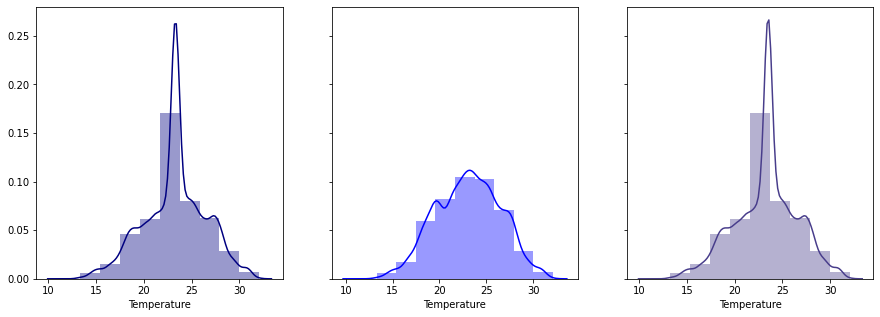

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5),sharey=True)
sns.distplot(
    Temp_imputer(dataset_train,1)['Temperature'],bins=10,color='navy', ax= ax1)
sns.distplot(
    Temp_imputer(dataset_train,2)['Temperature'],color='blue',bins=10, ax=ax2)
sns.distplot(
    Temp_imputer(dataset_train,3)['Temperature'],color='darkslateblue',bins=10,
                    ax=ax3)


**The three histograms above show different fillings of null in `Temperature`.**


*   The first gragh shows filling by mean of the observations.
*   The middle gragh shows filling by mean corresponding to day of month and weekday.

*   The last one shows filling by median of the observations.

From this we easily see that filling used in the middle graph is better based on the fact that the resulting data firly follows a normal distribution and is evenly spread. Thus this is the method chosen to fill the missing data in the column.







In [0]:
Train = Temp_imputer(dataset_train,2)

In [75]:
Train.isna().sum()

User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time                    0
Distance (KM)                  

In [0]:
Test = Temp_imputer(dataset_test,2)

In [77]:
Test.isna().sum()

User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                                0
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destination Lat                            0
Destinatio

### Feature Selection

The features selected to be removed from the datasets are features that have too many missing data points, e.g. 'Temperature', features that are not in the test dataset, e.g. 'Arrival at Destination - Day of Month', and features that were intuitively chosen beacause it was thought that they do not contribute the prediction of time from pickup to delivery.

In [0]:
Drop_train = ['User Id','Vehicle Type','Rider Id',
              'Precipitation in millimeters',
              'Arrival at Destination - Day of Month',
              'Arrival at Destination - Weekday (Mo = 1)',
              'Arrival at Destination - Time']

Drop_test = ['User Id','Vehicle Type','Rider Id',
             'Precipitation in millimeters']

Train.drop(columns=Drop_train,inplace=True)
Test.drop(columns=Drop_test,inplace=True)

In [79]:
Train.shape

(21201, 25)

In [80]:
Test.shape

(7068, 24)

### Feature Encoding

##### Label Encoding

In [0]:
# Instantiate labelencoder object
le = LabelEncoder()

Separating numeric features and categorical features for encoding.

In [0]:
# Numeric columns
Numeric_Train = Train._get_numeric_data()
Numeric_Test = Test._get_numeric_data()

# Categorical columns
Categorical_Train = Train.select_dtypes(include=['object'])
Categorical_Test = Test.select_dtypes(include=['object'])

Applying the label encoder on categorical features.

In [0]:
Encoded_Categorical_Train = Categorical_Train.apply(lambda x: le.fit_transform(x))
Encoded_Categorical_Test = Categorical_Test.apply(lambda x: le.fit_transform(x))

Rejoining numeric and categorical features.

In [0]:
Train_Encoded = pd.concat([Encoded_Categorical_Train, Numeric_Train], axis=1)
Test_Encoded = pd.concat([Encoded_Categorical_Test, Numeric_Test], axis=1)

In [85]:
Train_Encoded.shape

(21201, 25)

In [86]:
Test_Encoded.shape

(7068, 24)

### Model Training and Assessing

##### Splitting Train dataset

The splitting of the train dataset is to cross validate the models and assess model accuracy.

In [0]:
# Predictor Variavbles
X = Train_Encoded.drop('Time from Pickup to Arrival', axis = 1)

# Response Variables
y = Train_Encoded['Time from Pickup to Arrival']

In [88]:
print('Predictor Variables :\n\n',X.values,'\n')
print('Response Variable :\n\n',y.values)

Predictor Variables :

 [[0.0000e+00 1.4964e+04 1.5164e+04 ... 1.3090e+03 1.3800e+01 5.4900e+02]
 [1.0000e+00 2.3790e+03 2.5900e+03 ... 3.3900e+02 1.3600e+01 6.9000e+01]
 [0.0000e+00 4.9920e+03 5.1050e+03 ... 2.4200e+02 1.2500e+01 1.1400e+02]
 ...
 [0.0000e+00 1.2336e+04 1.2488e+04 ... 4.7300e+02 1.3800e+01 2.9000e+01]
 [1.0000e+00 1.4845e+04 1.4938e+04 ... 1.8210e+03 1.4000e+01 1.1010e+03]
 [0.0000e+00 7.9600e+03 7.9840e+03 ... 2.8600e+02 1.3600e+01 7.0000e+01]] 

Response Variable :

 [ 745 1993  455 ... 2953 1380 2128]


Splitting Train dataset into a subset Train data and a subset of validation data.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

##### Linear Regression model

In [91]:
# Instantiating Linear Model
linear_regress = LinearRegression()

# Training the Linear Model
linear_regress.fit(X_train, y_train)

# Predicting the train testing subset
y_pred_train_lr = linear_regress.predict(X_test)

# Assessing Linear Model accuracy using Root Mean Square Error and R-squared
print('RMSE       :',np.sqrt(mean_squared_error(y_test,y_pred_train_lr)))
print("R-squared  :", r2_score(y_test, y_pred_train_lr))

RMSE       : 798.7131451404825
R-squared  : 0.343214086685691


##### LASSO Regression Model

In [92]:
# Instantiating LASSO Model
lasso = Lasso(alpha=0.01)

# Training the LASSO Model
lasso.fit(X_train,y_train)

# Predicting the train testing subset
y_pred_train_lasso = lasso.predict(X_test)

# Assessing Ridge Model accuracy using Root Mean Square Error and R-squared
print('RMSE      :',np.sqrt(mean_squared_error(y_test,y_pred_train_lasso)))
print("R-sqaured :", r2_score(y_test, y_pred_train_lasso))

RMSE      : 798.7964807973203
R-sqaured : 0.34307702486016267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3687347949.1715403, tolerance: 1654412.1271723527
  positive)


##### Ridge Regression Model

In [93]:
# Instantiating Ridge Model
rr = Ridge(alpha=0.01)

# Training the Ridge Model
rr.fit(X_train, y_train)

# Predicting the train tesing subset
y_pred_train_rr = rr.predict(X_test)

# Assessing Ridge Model accuracy using Root Mean Square Error and R-squared
print('RMSE       :',np.sqrt(mean_squared_error(y_test,y_pred_train_rr)))
print("R-squared  :", r2_score(y_test, y_pred_train_rr))

RMSE       : 798.7134248358919
R-squared  : 0.3432136266956728


##### Decission Tree Regression Model

In [94]:
# Instantiating Decision Tree Model
dtree = DecisionTreeRegressor(max_depth=4,random_state=0)

# Training the Decision Tree Model
dtree.fit(X_train, y_train)

# Predicting the train tesing subset
y_pred_train_dt = dtree.predict(X_test)

# Assessing Ridge Model accuracy using Root Mean Square Error and R-squared
print('RMSE        :',np.sqrt(mean_squared_error(y_test,y_pred_train_dt)))
print("R-sqauered  :", r2_score(y_test, y_pred_train_dt))

RMSE        : 801.9283627379011
R-sqauered  : 0.33791566389201966


##### Random Forest Regression Model

In [96]:
# Instantiating Random Forest Model
rfreg = RandomForestRegressor(n_estimators = 200,random_state=0)

# Training the Random Forest Model
rfreg.fit(X_train,y_train)

# Predicting the train tesing subset
y_pred_train_rfreg = rfreg.predict(X_test)

# Assessing Ridge Model accuracy using Root Mean Square Error and R-squared
print('RMSE        :',np.sqrt(mean_squared_error(y_test,y_pred_train_rfreg)))
print("R-sqauered  :", r2_score(y_test, y_pred_train_rfreg))

RMSE        : 773.7561856246192
R-sqauered  : 0.38361731090739937


##### Support Vector Regression Model

In [97]:
# Instantiating SVR Model
svr_reg = SVR(kernel ='rbf',gamma='scale')

# Training the SVR Model
svr_reg.fit(X_train, y_train)

# Predicting the train tesing subset
y_pred_train_svr_reg = svr_reg.predict(X_test)

# Assessing Ridge Model accuracy using Root Mean Square Error and R-squared
print('RMSE        :',np.sqrt(mean_squared_error(y_test,y_pred_train_svr_reg)))
print("R-sqauered  :", r2_score(y_test, y_pred_train_svr_reg))

RMSE        : 1004.749865283802
R-sqauered  : -0.039341045310566036


###### Conclusion

From the models evaluated our Random Forest Regression Model has the lowest RMSE and coefficient of deternimation. Therefore this is the model to best predict the arrival for orders from pick-up to drop-off.

We would like to make sure we get the best out of this model. One way to do so is to tune hyperparameters of the model by using grid/random search.

### Hyperparameter tunning

To tune our model:
- We first make select parameters to tune.
- Then instantiate Random search.
- We then fit the training dataset to Random Search
- We retrieve the best parameters determined by Random Search
- Lastly we retrain our model using the best parameters

In [0]:
#Parameter Selection

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_state = list(range(0,43))

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state':random_state}

In [0]:
# Instantiate Random Search
RF_Random = RandomizedSearchCV(estimator=rfreg, 
                               param_distributions=random_grid,
                               n_iter=5, cv=5, verbose=2, random_state=42)

In [0]:
# Fit to Train data
RF_Random.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total= 1.5min
[CV] random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV]  random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total= 1.5min
[CV] random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total= 1.5min
[CV] random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total= 1.5min
[CV] random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  random_state=10, n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total= 1.5min
[CV] random_stat

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 113.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=200,
                              

In [0]:
# Retrieve best parameters for the our model
RF_Random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1400,
 'random_state': 10}

In [98]:
# Retraining of Random Forest model
rfreg = RandomForestRegressor(random_state=10,n_estimators=1400,
                              min_samples_split=5,min_samples_leaf=2,
                              max_features='sqrt',max_depth=40,
                              bootstrap=False)

rfreg.fit(X_train, y_train)

# Predicting the train tesing subset
y_pred_train_rfreg = rfreg.predict(X_test)

# Assessing Ridge Model accuracy using Root Mean Square Error and R-squared
print('RMSE        :',np.sqrt(mean_squared_error(y_test,y_pred_train_rfreg)))
print("R-sqauered  :", r2_score(y_test, y_pred_train_rfreg))

RMSE        : 764.8386771761683
R-sqauered  : 0.3977430107238593


### Predictions

Predictions made from the Test dataset  

In [0]:
rfreg_up = RandomForestRegressor(random_state=10,n_estimators=1400,
                              min_samples_split=5,min_samples_leaf=2,
                              max_features='sqrt',max_depth=40,
                              bootstrap=False)

rfreg_up.fit(X_train, y_train)
y_pred_train_rfreg = rfreg_up.predict(Test_Encoded)

In [0]:
submission = pd.DataFrame({'Order No': Test_Encoded.index, 
                           'Time from Pickup to Arrival': y_pred_train_rfreg})

In [101]:
submission.head()

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1601.726369
1,Order_No_12736,1254.793750
2,Order_No_768,1389.652619
3,Order_No_15332,1159.474667
4,Order_No_21373,1020.350869


Saving the predictions as a CSV to be sumbitted to Zindi.

In [0]:
submission = pd.DataFrame({'Order No': Test_Encoded.index, 
                           'Time from Pickup to Arrival': y_pred_train_rfreg})
submission.to_csv('Randfo_reg_test_upg(1).csv',index = False)

### Saving the Model

In [0]:
import pickle

model_save_path = "Randfo_reg_test_upg.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rfreg_up,file)